In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import scipy.stats as ss

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
facebook = pd.read_excel('fb.xlsx')
facebook.set_index('Date')
facebook.head()

Date   Open    High     Low   Close   Volume
0 2016-01-04  104.44  104.44   99.75  102.31  345674
1 2016-01-05  102.33  103.71  101.41  102.80  215313
2 2016-01-06  102.02  103.77  100.75  103.17  234525
3 2016-01-07  102.02  102.02   97.30   97.65  419638
4 2016-01-08   99.00  100.50   97.03   97.18  325973

In [3]:
facebook['OpenClose']= (facebook['Open ']+ facebook['Close '])/2
facebook['HighLow'] = (facebook['High ']+ facebook['Low '])/2

In [4]:
    ADS = pd.read_excel('ADS.xlsx')
    #Change name and format of date-column
    ADS = ADS.rename(columns={'Unnamed: 0': 'Date'})
    ADS['Date'] = pd.to_datetime(ADS['Date'],  format = "%Y%m%d")
    ADS.index = ADS['Date']
    ADS.drop(ADS.columns[0], axis=1,inplace=False)

    #Drop Days in YYYY-MM-DD
    ADS.index = ADS.index.map(lambda x: x.strftime('%Y-%m-%d'))

    #Time Slice
    ADS.tail()
    ADS = ADS.loc['2016-04-01':'2018-09-01']
    #print(ADS)
    
    FF3 = pd.read_excel('F-F_Research_Data_Factors_daily.xlsx',skiprows=4)
    
    T = FF3.shape[0]
    #print(T)

    #Drop last row of data - String
    FF3 = FF3[:T-2]

    #Convert YYYYMM into Date
    FF3['Unnamed: 0'] = pd.to_datetime(FF3['Unnamed: 0'],  format = "%Y%m%d")
    FF3.index = FF3['Unnamed: 0']
    FF3.drop(FF3.columns[0], axis=1,inplace=False)

    #Drop Days in YYYY-MM-DD
    FF3.index = FF3.index.map(lambda x: x.strftime('%Y-%m-%d'))

    FF3.tail()
    
    #Time Slice
    FF3 = FF3.loc['2016-04-01':'2018-09-01']
    FF3 = FF3.rename(columns={'Unnamed: 0': 'Date'})
    #print(FF3)
    FB = pd.read_excel('FB.xlsx')
    FB['Date'].dtype
    FB['Date'] = pd.to_datetime(FB['Date'],  format = "%Y%m%d")
    FB.index = FB['Date']
    FB.drop(FB.columns[0], axis=1,inplace=False)

    #Drop Days in YYYY-MM-DD
    FB.index = FB.index.map(lambda x: x.strftime('%Y-%m-%d'))

    FB.tail()
    FB = FB.loc['2016-04-01':'2018-09-01']
    #print(FB)
    T = FF3.shape[0]
    
    #Merge three data
    temp = pd.merge(FB,FF3)
    new_Data = pd.merge(temp,ADS)
    #print(new_Data)
    new_Data['open_tmr'] = new_Data['Open '].shift(-1)
    #Use yesterday's ADS-index, FF3, Close-price to predict today's Open-price
    Y = new_Data[['open_tmr']].as_matrix()[:-1]
    X = new_Data[['Mkt-RF','SMB','HML','Close ','ADS_Index']].as_matrix()[1:]
    N = X.shape
    #print(N,'+',Y.shape)
    #print(Y)
    new_Data.head()
    #temp.head()

D:\ProgramFiles\Anacondav2\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\ProgramFiles\Anacondav2\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Date   Open    High     Low   Close   Volume  Mkt-RF   SMB   HML   RF  \
0 2016-04-01  113.55  116.17  113.31  116.03  228874    0.64 -0.25 -0.62  0.0   
1 2016-04-04  115.78  116.33  111.61  112.30  452300   -0.41 -0.25 -0.74  0.0   
2 2016-04-05  111.79  113.32  111.47  112.30  210776   -0.94 -0.08 -0.36  0.0   
3 2016-04-06  112.48  113.81  112.40  113.75  192324    1.14  0.17 -0.82  0.0   
4 2016-04-07  113.29  114.89  113.06  113.37  191255   -1.23 -0.05 -0.35  0.0   

   ADS_Index  open_tmr  
0  -0.577836    115.78  
1  -0.548218    111.79  
2  -0.539699    112.48  
3  -0.532076    113.29  
4  -0.525350    114.07

In [5]:
def fama(X,Y):
    T = FF3.shape[0]
    N = X.shape
    'OLS REGRESSION STARTS'
    'LINEAR REGRESSION of Y: T x 1 on'
    'Regressors X: T x N'
    invXX = np.linalg.inv(X.transpose()@X)
    #print(invXX.shape)
    'OLS_estimates for coefficents: X x 1'
    beta_hat = invXX@X.transpose()@Y

    'Predictive value of Y using OLS'
    y_hat = X@beta_hat
    'Residuals from OLS'
    residuals = Y - y_hat
    'Variance of Residuals'
    sigma2 = (1/T)*residuals.transpose()@residuals
    'standard deviation of Y or residuals'
    sigma = np.sqrt(sigma2)
    'variance-covariance matrix of beta_hat'
    varcov_beta_hat = (sigma2)*invXX
    std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

    'Calculate R-square'
    R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
    adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])

    'Test Each Coefficient: beta_i'
    'Null Hypothesis: beta_i = 0'
    t_stat = (beta_hat.transpose()-0)/std_beta_hat
    p_val = 1-ss.norm.cdf(t_stat)

    'Test of Joint Significance of Model'
    F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
    (residuals.transpose()@residuals/(T-N[1]))
    p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
    
    rmse = np.sqrt(np.mean((y_hat-Y)**2))
    
    return beta_hat,y_hat


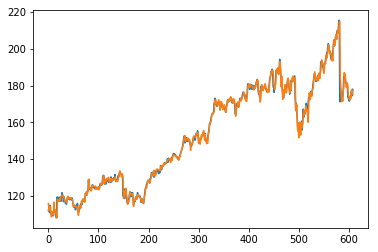

In [6]:
y_hat = fama(X,Y)[1]
plt.plot(y_hat)
plt.plot(Y)

In [7]:
def bootstrap():
    T = 250
    #print(T)
    N = X.shape[0]
    #print(N)
    
    yhat_ar1 = np.zeros(N-(T+1))
    window = 200
    num_boost = 500 # increase
    
    for t in range(T+1,N):
        X_train = new_Data[['Mkt-RF','SMB','HML','Close ','ADS_Index']][t-window:t-1]
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = facebook['Open '][t-window:t-1].values
       # print(X_train.shape)
       # print(Y_train.shape)
       
        X_pred = new_Data[['Mkt-RF','SMB','HML','Close ','ADS_Index']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])

        yhat_train = fama(X_train , Y_train)[1]
        res_train = Y_train - yhat_train
       
        y_pred_all = np.zeros(num_boost)
       
        for i in range (0,num_boost):
            err = np.random.choice(res_train,(window-1, ),replace = True)
            y_bstr = yhat_train + err
            beta_bstr = fama(X_train,y_bstr)[0]
           # print(X_pred.shape)
           # print(beta_bstr.shape)

            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i] = y_pred_bstr
           
        y_pred_ar1 = y_pred_all.mean()
       
        yhat_ar1[t-(T+1)] = y_pred_ar1
   
   
    rmse_ar1 = np.sqrt(np.mean((Y - yhat_ar1)**2))
   
    return yhat_ar1,rmse_ar1

In [8]:
rmse = bootstrap()[1]
rmse

32.89473946391554